In [4]:
import pandas as pd
import numpy as np

#Reports
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik
import shap

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Class
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

<b>Data Frame</b>

In [5]:
df = pd.read_csv("weatherer.csv")
# Important: Remove onehot encode
df.head()


,Temperature,Humidity,WindSpeed,Precipitation,Pressure,UV,Season,Visibility,Location,Type,CloudCover
0,14.0,73,9.5,82.0,1010.82,2,Winter,3.5,inland,1,1
1,39.0,96,8.5,71.0,1011.43,7,Spring,10.0,inland,0,1
2,30.0,64,7.0,16.0,1018.72,6,Spring,5.5,mountain,3,0
3,38.0,83,1.5,82.0,1026.25,7,Spring,1.0,coastal,3,0
4,27.0,74,17.0,66.0,990.67,1,Winter,2.5,mountain,1,3


In [6]:
#rename Variables to have no whitespace
df.rename(columns={'Wind Speed': 'WindSpeed'}, inplace=True)
df.rename(columns={'Cloud Cover': 'CloudCover'}, inplace=True)
df.rename(columns={'Atmospheric Pressure': 'Pressure'}, inplace=True)
df.rename(columns={'UV Index': 'UV'}, inplace=True)
df.rename(columns={'Visibility (km)': 'Visibility'}, inplace=True)
df.rename(columns={'Weather Type': 'Type'}, inplace=True)

# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['Season','Location']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

#cloud_cover_mapping = {'clear': 0, 'partly cloudy': 1, 'cloudy': 2, 'overcast': 3}
#df['CloudCover_Encoded'] = df['CloudCover'].map(cloud_cover_mapping)
#df = df.drop('CloudCover', axis=1)
# Rename the encoded column to CloudCover
#df = df.rename(columns={'CloudCover_Encoded': 'CloudCover'})

# Mapping numerical values to descriptive labels for CloudCover
#df['CloudCover'] = df['CloudCover'].replace({0: 'clear', 1: 'partly cloudy', 2: 'cloudy', 3: 'overcast'})


df = df.drop('Season_Autumn', axis=1)
df = df.drop('Location_coastal', axis=1)

<b>Y Data</b>

In [7]:
report = ProfileReport(df, title='Weather Data')
report.to_file("ydata_Weatherer.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>AutoViz</b>

In [8]:
AV = AutoViz_Class()
reg_av=report = AV.AutoViz("weatherer.csv")

Shape of your Data Set loaded: (13200, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Temperature,float64,0.000000,NA,-25.000000,71.500000,No issue
Humidity,int64,0.000000,0,20.000000,109.000000,No issue
WindSpeed,float64,0.000000,NA,0.000000,26.250000,No issue
Precipitation,float64,0.000000,NA,0.000000,109.000000,No issue
Pressure,float64,0.000000,NA,962.000000,1049.000000,No issue
UV,int64,0.000000,0,0.000000,13.000000,No issue
Season,object,0.000000,0,,,No issue
Visibility,float64,0.000000,NA,0.000000,14.250000,No issue
Location,object,0.000000,0,,,No issue
Type,int64,0.000000,0,0.000000,3.000000,No issue


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [19]:
report = AV.AutoViz("weatherer.csv", chart_format="bokeh", depVar="Type")

Shape of your Data Set loaded: (13200, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    10 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'cf0b97d6-b439-4678-a5cd-c7cc3437e2fb': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'4a526e75-5d2b-4e6b-868a-5f6fcfcf7f39': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'ae5913d6-5ae5-4542-ba40-8234dc82106a': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'279eaf6a-bf26-4e2a-89c6-0811f29d1f06': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'f16d2374-2896-4a5d-9e12-153a6cde915e': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'3639769a-8cc0-4d52-aacb-e6b5281ae63f': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'3fc7a087-3cb4-401e-a516-125408ee3ec8': {'version…

Time to run AutoViz (in seconds) = 5


<b>SweetViz</b>

In [10]:
report=sv.analyze(df)
report.show_html('sv_Weatherer.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_Weatherer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Phik-Matrix</b>

In [11]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['Temperature', 'Humidity', 'WindSpeed', 'Precipitation', 'Pressure', 'UV', 'Visibility', 'Type', 'CloudCover', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Location_inland', 'Location_mountain']


,Temperature,Humidity,WindSpeed,Precipitation,Pressure,UV,Visibility,Type,CloudCover,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
Temperature,1.000000,0.455125,0.276602,0.549434,0.674253,0.467891,0.504661,0.742897,0.458704,0.308214,0.305418,0.719277,0.167619,0.180393
Humidity,0.455125,1.000000,0.469947,0.649778,0.539283,0.443204,0.550898,0.593389,0.469950,0.132992,0.121753,0.308035,0.076864,0.048411
WindSpeed,0.276602,0.469947,1.000000,0.512875,0.332975,0.288433,0.427971,0.435965,0.311368,0.072179,0.056299,0.132266,0.037905,0.011913
Precipitation,0.549434,0.649778,0.512875,1.000000,0.601795,0.515069,0.660706,0.755665,0.582854,0.164954,0.145702,0.368500,0.089973,0.060162
Pressure,0.674253,0.539283,0.332975,0.601795,1.000000,0.493786,0.688774,0.750980,0.673300,0.278785,0.263819,0.645052,0.162219,0.148037
UV,0.467891,0.443204,0.288433,0.515069,0.493786,1.000000,0.418695,0.855710,0.700229,0.215644,0.190371,0.493240,0.094679,0.118038
Visibility,0.504661,0.550898,0.427971,0.660706,0.688774,0.418695,1.000000,0.670392,0.538053,0.171137,0.163687,0.407506,0.098942,0.071285
Type,0.742897,0.593389,0.435965,0.755665,0.750980,0.855710,0.670392,1.000000,0.837535,0.373859,0.373432,0.803681,0.202525,0.221126
CloudCover,0.458704,0.469950,0.311368,0.582854,0.673300,0.700229,0.538053,0.837535,1.000000,0.151722,0.149826,0.370666,0.088201,0.076908
Season_Spring,0.308214,0.132992,0.072179,0.164954,0.278785,0.215644,0.171137,0.373859,0.151722,1.000000,0.365808,0.619489,0.053197,0.057942


<b>Data Prep</b>
<p> is done in Python 3.9 you can see the report in the html folder</p>

<h3>X/Y Tets</h3>

<b>X</b>

In [12]:
# everything else except the target variable
X = df.drop(["Type"], axis=1)

<b>Y Classification</b>

In [13]:
# have only the target variable here (dependent variable)
y_temp = df['Type']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

<b>Shap</b>

In [14]:
%matplotlib inline

In [15]:
# Could not use shap, 
# Error: ValueError: Per-column arrays must each be 1-dimensional
# AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.
data=df
le = LabelEncoder()
data['Type_encoded'] = le.fit_transform(data['Type'])
data=data.drop(['Type'],axis=1)

X = data.drop(columns='Type_encoded')
y = data['Type_encoded']
data


,Temperature,Humidity,WindSpeed,Precipitation,Pressure,UV,Visibility,CloudCover,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Type_encoded
0,14.0,73,9.5,82.0,1010.82,2,3.5,1,0,0,1,1,0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,1,1,0,0,1,0,0
2,30.0,64,7.0,16.0,1018.72,6,5.5,0,1,0,0,0,1,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,1,0,0,0,0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,3,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,3,0,1,0,0,1,1
13196,-1.0,76,3.5,23.0,1049.00,1,6.0,2,0,0,1,0,0,2
13197,30.0,77,5.5,28.0,1012.69,3,9.0,3,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,3,0,0,1,1,0,2


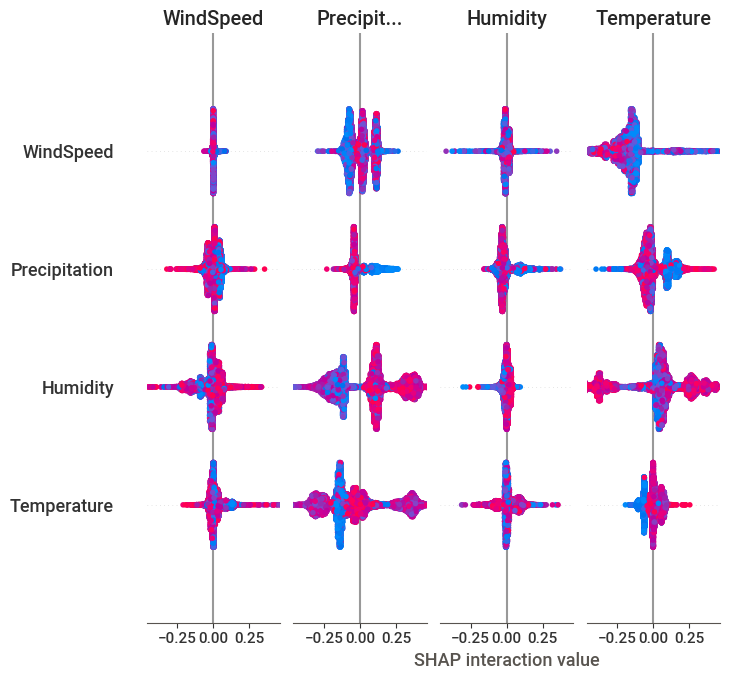

ValueError: Per-column arrays must each be 1-dimensional

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=0)

# Train a classification model
model = RandomForestClassifier()
model.fit(X_train, y_train)



explainer = shap.TreeExplainer(model)
# SHAP values for multi-class classification return a list of shap_values, one for each class
shap_values = explainer.shap_values(X)




# Plot SHAP summary
shap.summary_plot(shap_values, X, feature_names=X.columns)


importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

<b>Fisher</b>

<Axes: >

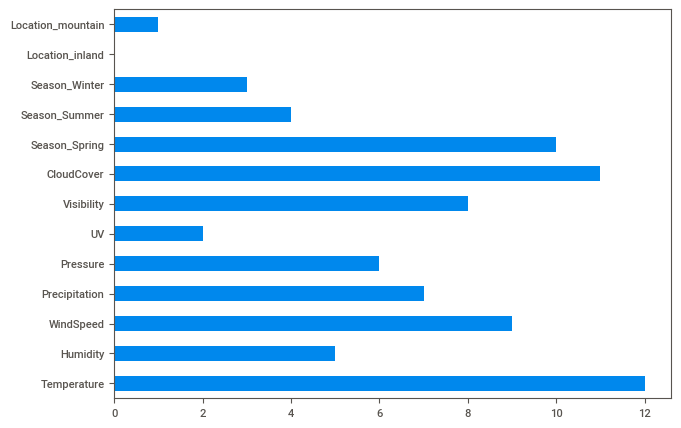

In [17]:
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')